10000  number of items bubble sorted in  5.710134506225586 seconds
30000  number of items bubble sorted in  64.87368297576904 seconds
50000  number of items bubble sorted in  185.0927197933197 seconds
70000  number of items bubble sorted in  529.1266446113586 seconds
90000  number of items bubble sorted in  700.7519855499268 seconds


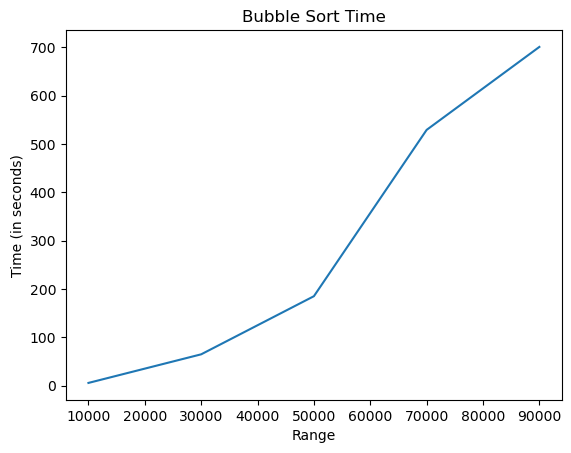

In [26]:
import time
import random
import matplotlib.pyplot as plt

mylist = []

def bubblesort():
    unsorted = True
    while unsorted:
        for x in range(len(mylist)-1):
            for y in range(0, len(mylist)-x-1):
                if mylist[y] > mylist[y + 1]:
                    mylist[y], mylist[y+1] = mylist[y+1], mylist[y] # has to be done in one line
                else: 
                    unsorted = False
    return mylist

def shellsort():
    interval = len(mylist) // 2
    while interval > 0:
        for i in range(interval, len(mylist)):
            temp = mylist[i]
            j = i
            while j >= interval and mylist[j - interval] > temp:
                mylist[j] = mylist[j - interval]
                j -= interval
            mylist[j] = temp
        interval //= 2
    return mylist

def partition(mylist, low, high):
	pivot = mylist[high]
	i = low - 1
	for j in range(low, high):
		if mylist[j] <= pivot:
			i = i + 1
			(mylist[i], mylist[j]) = (mylist[j], mylist[i])
	(mylist[i + 1], mylist[high]) = (mylist[high], mylist[i + 1])
	return i + 1

def quickSort(mylist, low, high):
    if low < high:
        pi = partition(mylist, low, high)
        quickSort(mylist, low, pi - 1)
        quickSort(mylist, pi + 1, high)
    return mylist


def fillList(lst, num):  
    lst.clear()
    for i in range(0,num): # create num random numbers
        x = random.randint(1,10000) # ranges 1 to 10000
        lst.append(x)
        
def plotBubble():
    times = [10000, 30000, 50000, 70000, 90000]
    plot = {}
    for x in range(0,5):
        fillList(mylist, times[x])
        start_time = time.time()
        bubblesort()
        stop_time = time.time() - start_time
        plot[times[x]] = stop_time
        print(times[x]," number of items bubble sorted in ", stop_time, "seconds")
    return plot

def plotShell():
    times = [10000, 30000, 50000, 70000, 90000]
    plot = {}
    for x in range(0,5):
        fillList(mylist, times[x])
        start_time = time.time()
        shellsort()
        stop_time = time.time() - start_time
        plot[times[x]] = stop_time
        print(times[x]," number of items shell sorted in ", stop_time, "seconds")

    return plot

def plotQuick():
    times = [10000, 30000, 50000, 70000, 90000]
    plot = {}
    for x in range(0,5):
        fillList(mylist, times[x])
        start_time = time.time()
        quickSort(mylist, 0, len(mylist)-1)
        stop_time = time.time() - start_time
        plot[times[x]] = stop_time
        print(times[x]," number of items quick sorted in ", stop_time, "seconds")
    return plot

def graphPlot(plot, title):
    plt.title(title)
    plt.plot(plot.keys(),plot.values())
    plt.xlabel('Range')
    plt.ylabel('Time (in seconds)')

#commented for testing, only one can go at a time, whoops 
graphPlot(plotQuick(), "Quick Sort Time")
#graphPlot(plotShell(), "Shell Sort Time")
#graphPlot(plotBubble(), "Bubble Sort Time")

